<a href="https://colab.research.google.com/github/AmitRanjan953/GAN-Model-/blob/main/Skill-09/Custom-Cartoon-GAN/Selfie2Anime-Modified-CartoonGAN/Custom-Cartoon-GAN-Selfie2Anime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Useful Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline
from tensorflow.keras.optimizers import legacy


In [4]:
import tensorflow
print (tensorflow.__version__)

2.18.0


# Load and Unzip Data

In [5]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
aaa

In [18]:
!wget https://zenodo.org/record/10130356/files/selfie2anime.zip
!unzip selfie2anime.zip -d /content/selfie2anime

Streaming output truncated to the last 5000 lines.
  inflating: /content/selfie2anime/trainA/female_26059.jpg  
  inflating: /content/selfie2anime/trainA/female_26076.jpg  
  inflating: /content/selfie2anime/trainA/female_26092.jpg  
  inflating: /content/selfie2anime/trainA/female_26125.jpg  
  inflating: /content/selfie2anime/trainA/female_26139.jpg  
  inflating: /content/selfie2anime/trainA/female_26145.jpg  
  inflating: /content/selfie2anime/trainA/female_26149.jpg  
  inflating: /content/selfie2anime/trainA/female_26157.jpg  
  inflating: /content/selfie2anime/trainA/female_26167.jpg  
  inflating: /content/selfie2anime/trainA/female_26181.jpg  
  inflating: /content/selfie2anime/trainA/female_26190.jpg  
  inflating: /content/selfie2anime/trainA/female_26195.jpg  
  inflating: /content/selfie2anime/trainA/female_26219.jpg  
  inflating: /content/selfie2anime/trainA/female_26223.jpg  
  inflating: /content/selfie2anime/trainA/female_26226.jpg  
  inflating: /content/selfie2anime

In [19]:
import glob
faces = glob.glob('/trainA/*.jpg')
animes = glob.glob("/trainB/*.jpg")
faces_test = glob.glob('/testA/*.jpg')
animes_test = glob.glob("/testB/*.jpg")

In [20]:
path = '/content/selfie2anime/'

In [21]:
import glob
faces = glob.glob(path + '/trainA/*.jpg')
animes = glob.glob(path + "/trainB/*.jpg")
faces_test = glob.glob(path + '/testA/*.jpg')
animes_test = glob.glob(path + "/testB/*.jpg")

In [22]:
len(faces), len(animes), len(faces_test), len(animes_test)

(3400, 3400, 100, 100)

In [10]:
import cv2
for file in faces[:10]:
    img = cv2.imread(file)
    print (img.shape)

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


# Display Few Samples

Human Faces


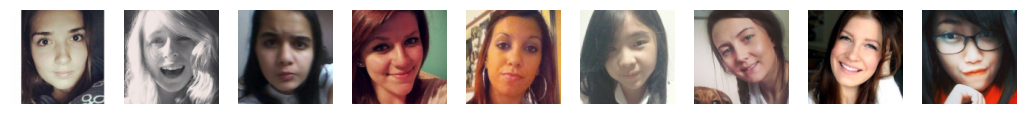

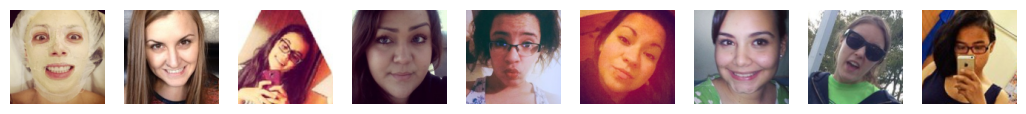

--------------------------------------------------------------------------------
Anime Faces


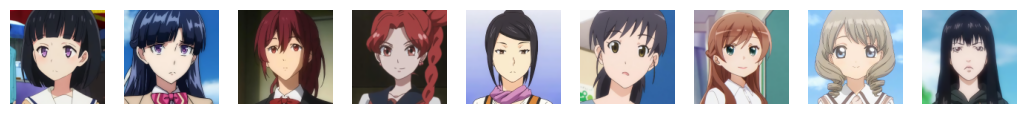

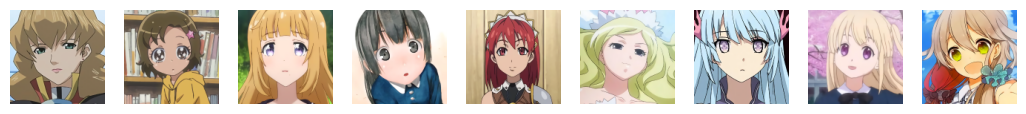

In [11]:
print ("Human Faces")
for k in range(2):
    plt.figure(figsize=(13, 13))
    for j in range(9):
        file = np.random.choice(faces)
        img = cv2.imread(file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (128,128))
        plt.subplot(990 + 1 + j)
        plt.imshow(img)
        plt.axis('off')
        #plt.title(trainY[i])
    plt.show()

print ("-"*80)
print ("Anime Faces")
for k in range(2):
    plt.figure(figsize=(13, 13))
    for j in range(9):
        file = np.random.choice(animes)
        img = cv2.imread(file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (128,128))
        plt.subplot(990 + 1 + j)
        plt.imshow(img)
        plt.axis('off')
        #plt.title(trainY[i])
    plt.show()

In [13]:
!pip install tensorflow-addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 18.3 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.2
    Uninstalling typeguard-4.4.2:
      Successfully uninstalled typeguard-4.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.5.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [1]:
!pip install tensorflow==2.15 keras==2.15 tensorflow-addons


# Define Generator Model (U-Net Like)

In [2]:
import tensorflow_addons as tfa

/usr/local/lib/python3.11/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [3]:
def encoder_layer(input_layer, filters, bn=True):
    x = tensorflow.keras.layers.Conv2D(filters, kernel_size=(4,4), strides=(2,2), padding='same')(input_layer)
    x = tensorflow.keras.layers.LeakyReLU(alpha=0.2)(x)
    if bn:
        #x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)
        x = tfa.layers.InstanceNormalization()(x)
    return x

def decoder_layer(input_layer, skip_input, filters):
    #x = tensorflow.keras.layers.UpSampling2D(size=2)(input_layer)
    x = tensorflow.keras.layers.Conv2DTranspose(filters, kernel_size=(4,4), strides=(2,2), padding='same')(input_layer)
    x = tensorflow.keras.layers.Activation('relu')(x)
    #x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)
    x = tfa.layers.InstanceNormalization()(x)
    x = tensorflow.keras.layers.Concatenate()([x, skip_input])
    return x

In [5]:
import tensorflow

In [6]:
def make_generator():
    source_image = tensorflow.keras.layers.Input(shape=(128, 128, 3))
    target_style = tensorflow.keras.layers.Input(shape=(16, 16, 512))

    e1 = encoder_layer(source_image, 64, bn=False)
    e2 = encoder_layer(e1, 128)
    e3 = encoder_layer(e2, 256)
    # e4 = encoder_layer(e3, 256)
    e5 = encoder_layer(e3, 512)
    e6 = encoder_layer(e5, 512)
    e7 = encoder_layer(e6, 512)

    bottle_neck = tensorflow.keras.layers.Conv2D(512, (4,4), strides=(2,2), padding='same')(e7)
    b = tensorflow.keras.layers.Activation('relu')(bottle_neck)

    d1 = decoder_layer(b, e7, 512)
    d2 = decoder_layer(d1, e6, 512)
    d3 = decoder_layer(d2, e5, 512)
    # d4 = decoder_layer(d3, e4, 256)
    d5 = decoder_layer(d3, e3, 256)
    d5 = tensorflow.keras.layers.Concatenate()([d5, target_style])
    d6 = decoder_layer(d5, e2, 128)
    d7 = decoder_layer(d6, e1, 64)

    decoded = tensorflow.keras.layers.Conv2DTranspose(3, kernel_size=(4,4), strides=(2,2), padding='same')(d7)
    translated_image = tensorflow.keras.layers.Activation('tanh')(decoded)
    return source_image, target_style, translated_image

source_image, target_style, translated_image = make_generator()
generator_network = tensorflow.keras.models.Model(inputs=[source_image, target_style], outputs=translated_image)
print (generator_network.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 64, 64, 64)           3136      ['input_1[0][0]']             
                                                                                                  
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 64)           0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 32, 32, 128)          131200    ['leaky_re_lu[0][0]']         
                                                                                              

# Define Discriminator Network

In [7]:
def my_conv_layer(input_layer, filters, bn=True):
    x = tensorflow.keras.layers.Conv2D(filters, kernel_size=(4,4), strides=(2,2), padding='same')(input_layer)
    x = tensorflow.keras.layers.LeakyReLU(alpha=0.2)(x)
    if bn:
        #x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)
        x = tfa.layers.InstanceNormalization()(x)
    return x

In [8]:
 def make_discriminator():
    target_image_input = tensorflow.keras.layers.Input(shape=(128, 128, 3))

    x = my_conv_layer(target_image_input, 64, bn=False)
    x = my_conv_layer(x, 128)
    x = my_conv_layer(x, 256)
    # x = my_conv_layer(x, 512)
    x = my_conv_layer(x, 512)

    patch_features = tensorflow.keras.layers.Conv2D(1, kernel_size=(4,4), strides=(1,1), padding='same')(x)
    return target_image_input, patch_features


target_image_input, patch_features = make_discriminator()
discriminator_network = tensorflow.keras.models.Model(inputs=target_image_input, outputs=patch_features)

print (discriminator_network.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 64)        3136      
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 64, 64, 64)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 128)       131200    
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 32, 32, 128)       0         
                                                                 
 instance_normalization_11   (None, 32, 32, 128)       256       
 (InstanceNormalization)                                         
                                                           

In [2]:
adam_optimizer = legacy.Adam(learning_rate=0.0002, beta_1=0.5)
discriminator_network.compile(loss='mse', optimizer=adam_optimizer, metrics=['accuracy'])

ImportError: `keras.optimizers.legacy` is not supported in Keras 3. When using `tf.keras`, to continue using a `tf.keras.optimizers.legacy` optimizer, you can install the `tf_keras` package (Keras 2) and set the environment variable `TF_USE_LEGACY_KERAS=True` to configure TensorFlow to use `tf_keras` when accessing `tf.keras`.

# Load and Extract VGG features

In [10]:
image_input = tensorflow.keras.layers.Input(shape=(128, 128, 3))

pre_trained_vgg = tensorflow.keras.applications.vgg19.VGG19(weights='imagenet', input_shape=(128, 128, 3), include_top=False)
pre_trained_vgg_model = tensorflow.keras.models.Model(inputs=pre_trained_vgg.input, outputs=pre_trained_vgg.get_layer('block4_conv4').output)

pre_trained_image_feautures = pre_trained_vgg_model(image_input)

custom_vgg = tensorflow.keras.models.Model(inputs=image_input, outputs=pre_trained_image_feautures)
print (custom_vgg.summary())

80134624/80134624 [==============================] - 2s 0us/step
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 model_2 (Functional)        (None, 16, 16, 512)       10585152  
                                                                 
Total params: 10585152 (40.38 MB)
Trainable params: 10585152 (40.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


# Define Customized-Face2Anime-GAN

In [11]:
source_image = tensorflow.keras.layers.Input(shape=(128, 128, 3))
target_features = tensorflow.keras.layers.Input(shape=(16, 16, 512))

# Domain Transfer
custom_vgg.trainable=False
fake_anime = generator_network([source_image, target_features])

discriminator_network.trainable=False

# Tell Real vs Fake
real_vs_fake = discriminator_network(fake_anime)

face2anime_gan = tensorflow.keras.models.Model(inputs =[source_image, target_features], outputs = [real_vs_fake, fake_anime, fake_anime])
face2anime_gan.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 input_7 (InputLayer)        [(None, 16, 16, 512)]        0         []                            
                                                                                                  
 model (Functional)          (None, 128, 128, 3)          4288205   ['input_6[0][0]',             
                                                          1          'input_7[0][0]']             
                                                                                                  
 model_1 (Functional)        (None, 8, 8, 1)              2766529   ['model[0][0]']         

# Custom Content Loss (vgg features Loss)

In [12]:
def custom_content_loss(y_true, y_pred):
    custom_vgg.trainable=False
    y_true_features = custom_vgg(y_true)
    y_pred_features = custom_vgg(y_pred)
    content_loss = tensorflow.keras.losses.mean_absolute_error(y_true_features, y_pred_features)
    return content_loss

def custom_content_loss2(y_true, y_pred):
    custom_vgg.trainable=False
    y_true_features = y_true
    y_pred_features = custom_vgg(y_pred)
    content_loss = tensorflow.keras.losses.mean_absolute_error(y_true_features, y_pred_features)
    return content_loss

# Compiling Models

In [13]:
face2anime_gan.compile(loss=['mse', custom_content_loss, custom_content_loss],\
                       optimizer=adam_optimizer, loss_weights=[1, 1, 0.1])

# Define Data Generators

In [14]:
def faces_to_animes(faces, styles, generator_network):
    styles = custom_vgg(styles)
    generated_samples = generator_network.predict_on_batch([faces, styles])
    return generated_samples

def get_training_samples(batch_size):
    random_files = np.random.choice(faces, size=batch_size)
    images = []
    for file in random_files:
        img = cv2.imread(file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (128, 128))
        images.append((img-127.5)/127.5)
    face_images = np.array(images)

    random_files = np.random.choice(animes, size=batch_size)
    images = []
    for file in random_files:
        img = cv2.imread(file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (128, 128))
        images.append((img-127.5)/127.5)
    anime_images = np.array(images)
    return face_images, anime_images

def show_generator_results(generator_network):
    images = []
    styles = []
    for j in range(7):
        file = np.random.choice(faces_test)
        img = cv2.imread(file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (128, 128))
        images.append(img)

        file = np.random.choice(animes_test)
        img = cv2.imread(file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (128, 128))
        styles.append(img)

    print ('Human Face Images')
    plt.figure(figsize=(13, 13))
    for j, img in enumerate(images):
        plt.subplot(770 + 1 + j)
        plt.imshow(img)
        plt.axis('off')
        #plt.title(trainY[i])
    plt.show()

    # print ('Style Images')
    # plt.figure(figsize=(13, 13))
    # for j, img in enumerate(styles):
    #     plt.subplot(770 + 1 + j)
    #     plt.imshow(img)
    #     plt.axis('off')
    #     #plt.title(trainY[i])
    # plt.show()

    print ('Customized Anime Version')
    plt.figure(figsize=(13, 13))
    for j, img in enumerate(images):
        img = (img-127.5)/127.5
        style = (styles[j]-127.5)/127.5
        output = faces_to_animes(np.array([img]), np.array([style]), generator_network)[0]
        output = (output+1.0)/2.0
        plt.subplot(770 + 1 + j)
        plt.imshow(output)
        plt.axis('off')
        #plt.title(trainY[i])
    plt.show()

# Training Face2Anime-GAN

In [23]:
len(faces), len(animes)

(3400, 3400)

In [30]:
!pip install opencv-python


In [31]:
import cv2

In [33]:
from tensorflow.keras.optimizers import legacy


Human Face Images


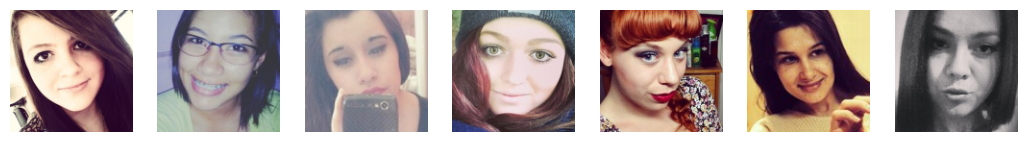

Customized Anime Version


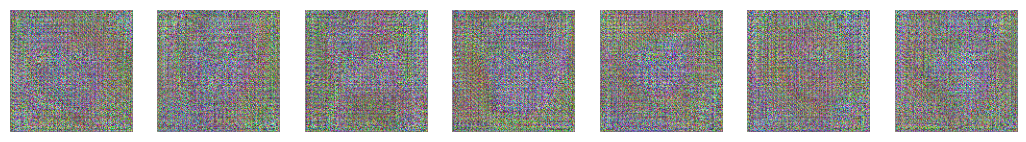

KeyError: in user code:

    File "/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py", line 1154, in train_step
        self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/optimizer.py", line 544, in minimize
        self.apply_gradients(grads_and_vars)
    File "/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients
        return super().apply_gradients(grads_and_vars, name=name)
    File "/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients
        iteration = self._internal_apply_gradients(grads_and_vars)
    File "/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients
        return tf.__internal__.distribute.interim.maybe_merge_call(
    File "/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn
        distribution.extended.update(
    File "/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/optimizer.py", line 1342, in apply_grad_to_update_var  **
        return self._update_step(grad, var)
    File "/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/optimizer.py", line 233, in _update_step
        raise KeyError(

    KeyError: 'The optimizer cannot recognize variable conv2d/kernel:0. This usually means you are trying to call the optimizer to update different parts of the model separately. Please call `optimizer.build(variables)` with the full list of trainable variables before the training loop or use legacy optimizer `tf.keras.optimizers.legacy.Adam.'


In [32]:
epochs = 500
batch_size = 1
steps = 3400

for i in range(0, epochs):
    # if i%1 == 0:
    #     show_generator_results(generator_network)
    for j in range(steps):
        if j%200 == 0:
            show_generator_results(generator_network)
            generator_network.save(path + "weights/model_" + str(i) + "_" + str(j))

        human_faces, anime_faces = get_training_samples(batch_size)

        fake_patch = np.zeros((batch_size, 8, 8, 1))
        real_patch = np.ones((batch_size, 8, 8, 1))

        custom_vgg.trainable=False
        styles = custom_vgg(anime_faces)
        fake_anime_faces = generator_network([human_faces, styles])

        # Updating Discriminator weights
        discriminator_network.trainable=True
        loss_d_real = discriminator_network.train_on_batch(anime_faces, real_patch)
        loss_d_fake = discriminator_network.train_on_batch(fake_anime_faces, fake_patch)

        loss_d = np.add(loss_d_real, loss_d_fake)/2.0

        # Make the Discriminator belive that these are real samples and calculate loss to train the generator
        discriminator_network.trainable=False
        # custom_vgg.trainable=False
        # y_true_features1 = custom_vgg(human_faces)
        # y_true_features2 = custom_vgg(anime_faces)

        # avg_features = np.add(y_true_features1, y_true_features2)/2.0

        # Updating Generator weights
        loss_g = face2anime_gan.train_on_batch([human_faces, styles],[real_patch, human_faces, anime_faces])

        if j%100 == 0:
            print ("Epoch:%.0f, Step:%.0f, D-Loss:%.3f, D-Acc:%.3f, G-Loss:%.3f"%(i,j,loss_d[0],loss_d[1]*100,loss_g[0]))
